<a href="https://colab.research.google.com/github/bharat1611/Fraud-Detection---Insurance-Claims/blob/main/Fraud_Detection_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **IMPORTING LIBRARIES**

In [48]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [49]:
df = pd.read_csv('/content/insurance_claims.csv')

In [50]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [51]:
#we have some missing values in the dataset represented by '?', so to eliminate them as outliers, lets replace them by np.nan

df.replace('?', np.nan, inplace = True)

In [52]:
#calculating some basic statistical data like mean, count, std etc.

df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [53]:
# returning the concise summary of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

### **DATA PRE-PROCESSING**

In [47]:
# checking the NaN values in every column 
df.isna().sum()

months_as_customer             0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
fraud_reported                 0
dtype: int64

### **VISUALIZING MISSING VALUES**

In [ ]:
#showing the the total number of values available and total missing using graph

import missingno as msno

msno.bar(df)
plt.show()

### **HANDLING MISSING VALUES**

*Setting the attributes having NaN values to 0*

In [54]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

In [55]:
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])

In [56]:
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

*Counting the NaN values after setting them to 0.
The output received is 0 for all columns which means that number of NaN values are 0.*

In [57]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

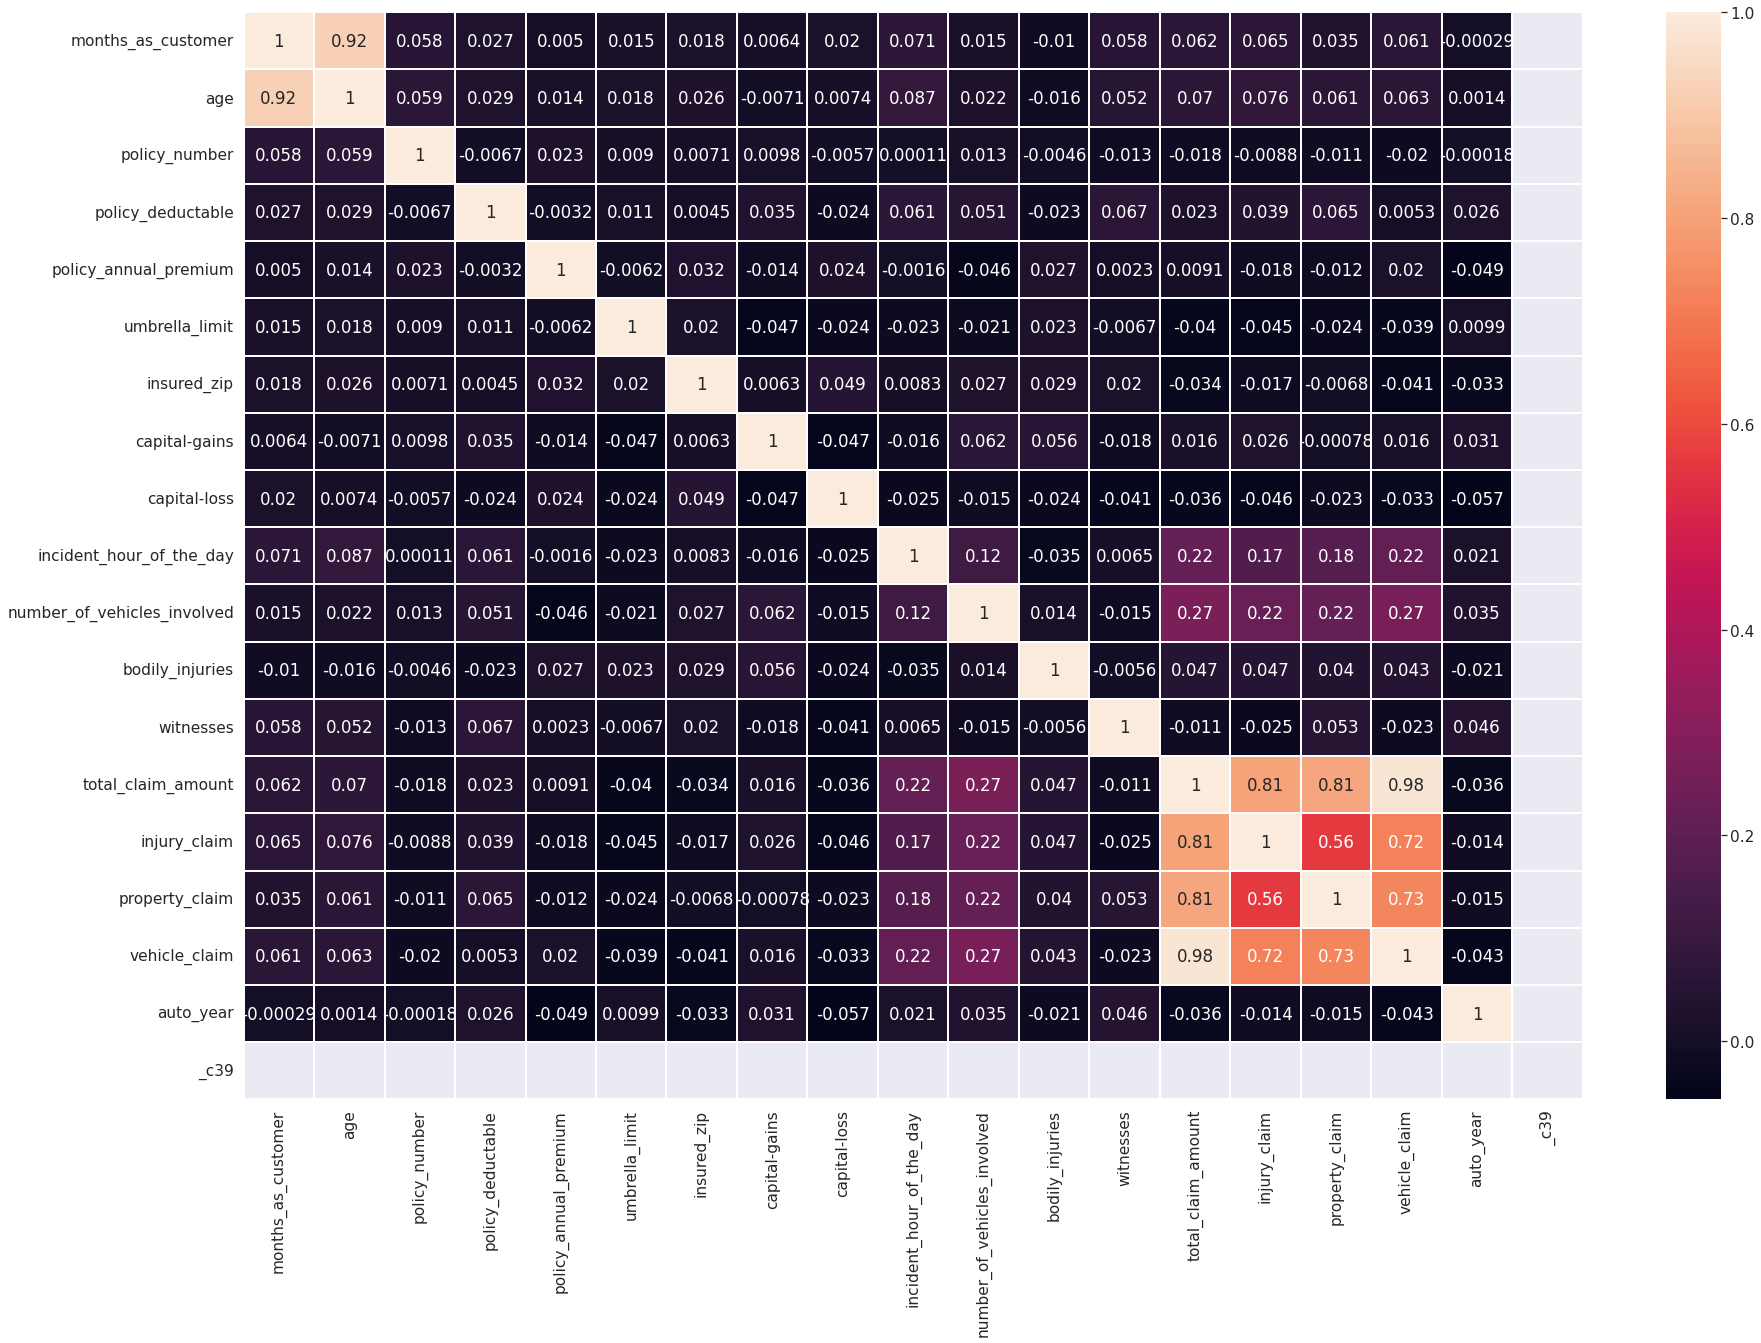

In [58]:
#heatmap to visualize the values

plt.figure(figsize = (30,20))
corr = df.corr()
sns.set(font_scale = 1.4)
sns.heatmap(data = corr,annot=True, fmt = '.2g', linewidth = 1)
plt.show()


In [59]:
#Count number of distinct elements in data set
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [60]:
# We only some labels to predict the insurance fraud 
# hence, dropping unnecessary labels from our dataset.
to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39']
df.drop(to_drop, inplace = True, axis  = 1)


In [61]:
# viewing the remaining labels
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


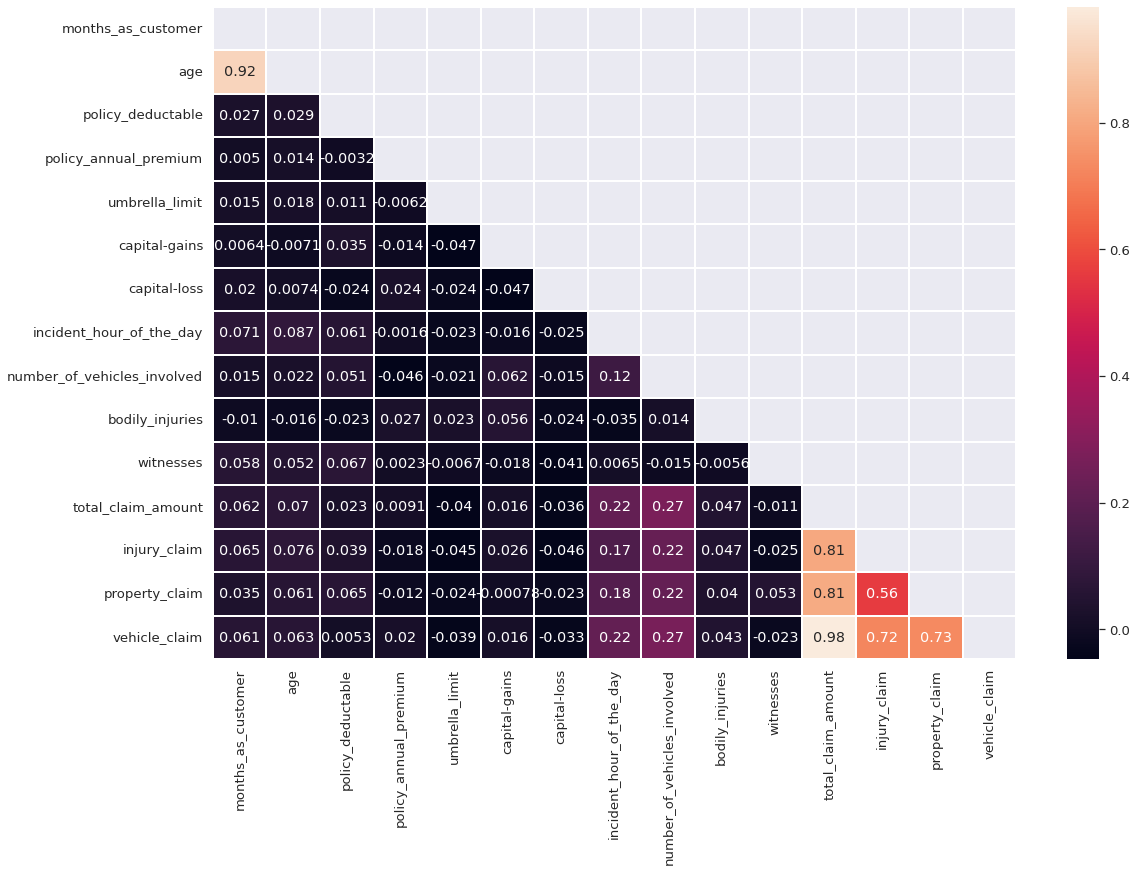

In [62]:
# checking for multicollinearity

plt.figure(figsize = (18, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.set(font_scale = 1.2)

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

We can see that there is high correlation between age and months_as_customer.We will drop the "Age" column. Also there is high correlation between total_clam_amount, injury_claim, property_claim, vehicle_claim as total claim is the sum of all others. So we will drop the total claim column.

In [63]:
to_drop = ['age','total_claim_amount']
df.drop(to_drop, inplace = True, axis = 1)


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_csl                   1000 non-null   object 
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_sex                  1000 non-null   object 
 6   insured_education_level      1000 non-null   object 
 7   insured_occupation           1000 non-null   object 
 8   insured_relationship         1000 non-null   object 
 9   capital-gains                1000 non-null   int64  
 10  capital-loss                 1000 non-null   int64  
 11  incident_type                1000 non-null   object 
 12  collision_type               1000 non-null   object 
 13  incident_severity  

In [65]:
# Age and total_claim_amount have been successfully dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_csl                   1000 non-null   object 
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_sex                  1000 non-null   object 
 6   insured_education_level      1000 non-null   object 
 7   insured_occupation           1000 non-null   object 
 8   insured_relationship         1000 non-null   object 
 9   capital-gains                1000 non-null   int64  
 10  capital-loss                 1000 non-null   int64  
 11  incident_type                1000 non-null   object 
 12  collision_type               1000 non-null   object 
 13  incident_severity  

In [69]:
# separating the feature and target columns

X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

In [67]:
df.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,NO,0,0,NO,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,NO,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N


### **ENCODING CATEGORICAL VARIABLES**

In [36]:
#extracting categorical columns
cat_df = X.select_dtypes(include = ['object'])

In [37]:
cat_df.head()

""
0
1
2
3
4


In [38]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

In [39]:
#converting categorical variables to dummy/indicator values
# one-hot-encoding 
cat_df = pd.get_dummies(cat_df, drop_first = True)

ValueError: ignored

In [ ]:
cat_df.head()

In [ ]:
# extracting the numerical columns

num_df = X.select_dtypes(include = ['int64'])

In [ ]:
num_df.head()

In [ ]:
# combining the Numerical and Categorical dataframes to get final dataset
X = pd.concat([num_df, cat_df], axis = 1)

In [ ]:
X.head()

In [ ]:
# Displaying the data and checking the density of required data fields
plt.figure(figsize = (25,20))
plotnumber = 1

for col in X.columns : 
  if plotnumber <= 24:
    ax = plt.subplot(5,5, plotnumber)
    sns.distplot(X[col])
    plt.xlabel(col, fontsize = 15)
  
  plotnumber = plotnumber + 1

plt.tight_layout()
plt.show()

### **OUTLIERS DETECTION**

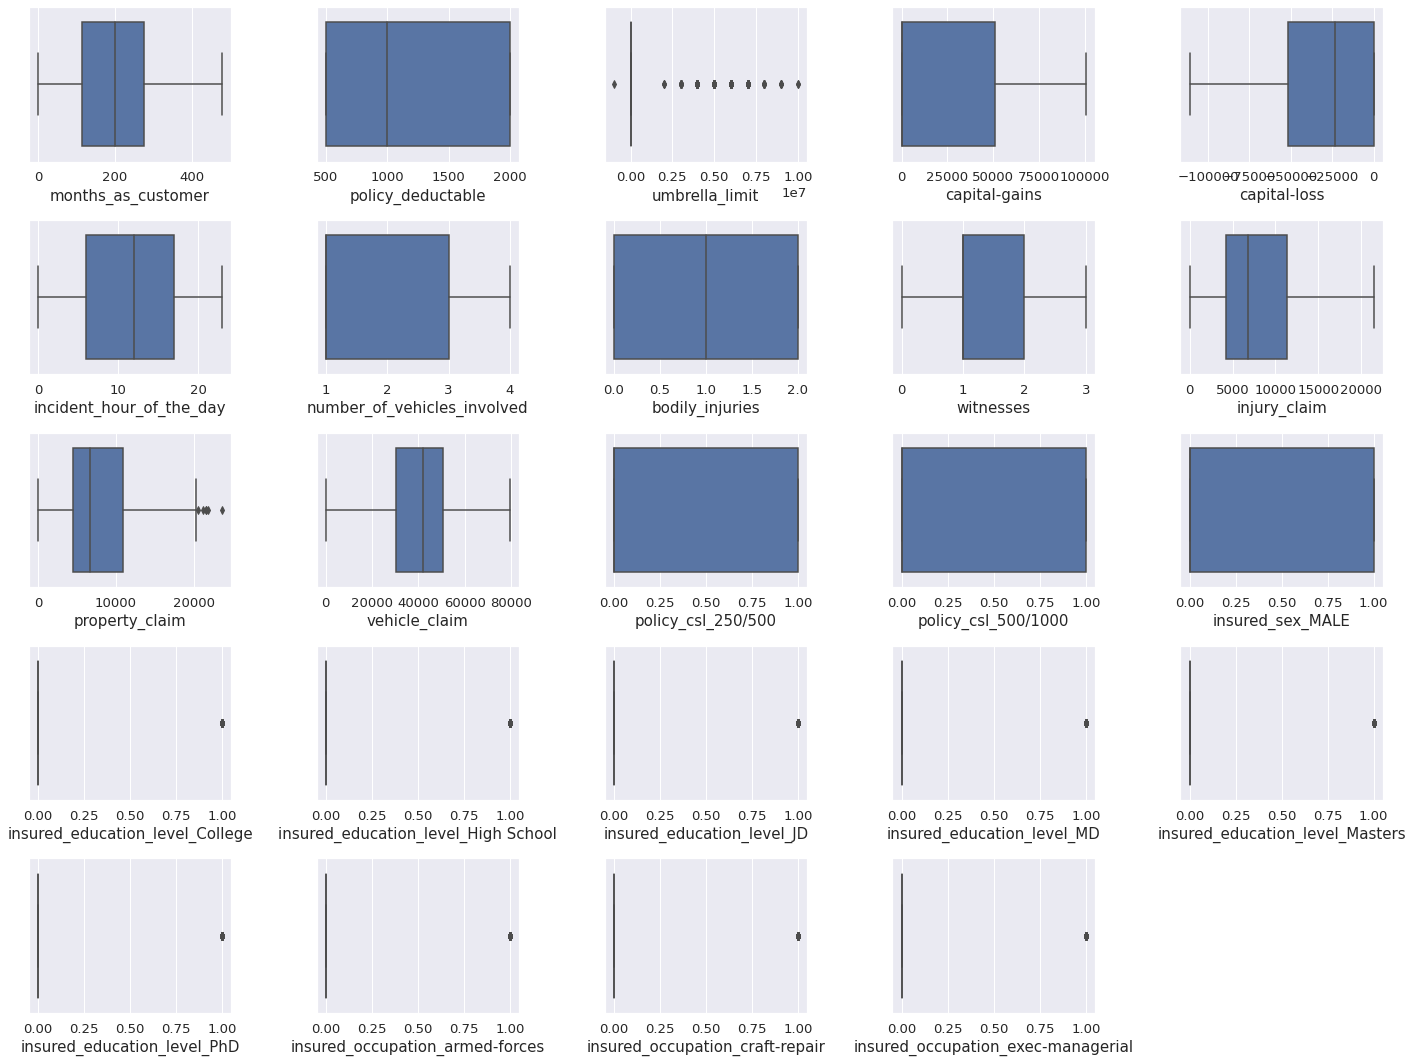

In [34]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

In [83]:

#Splitting arrays or matrices data into random train and test subsets.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [84]:
X_train.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim
956,95,500/1000,2000,1356.64,0,MALE,Masters,machine-op-inspct,not-in-family,67800,...,Police,21,3,YES,0,3,YES,15120,15120,52920
346,429,250/500,1000,1127.89,6000000,MALE,Associate,machine-op-inspct,own-child,67400,...,Ambulance,0,1,YES,2,0,YES,6580,6580,26320
536,254,250/500,2000,1472.43,0,MALE,MD,tech-support,husband,0,...,Ambulance,3,3,NO,1,3,YES,5780,11560,46240
163,112,500/1000,1000,1166.54,0,FEMALE,Masters,prof-specialty,not-in-family,47700,...,Fire,3,1,YES,2,0,NO,10790,21580,75530
284,189,250/500,2000,1388.58,0,FEMALE,MD,priv-house-serv,own-child,0,...,Police,17,3,NO,1,3,YES,13260,13260,53040


In [85]:
#training specific labels in the dataset
num_df = X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [76]:
#scaling the numeric values in the dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)
scaled_data

array([[ 0.67107684,  1.44723707, -0.49774998, ..., -0.39301562,
         0.75169441,  0.33443829],
       [-0.75128413, -0.19984609, -0.49774998, ..., -1.42213476,
        -1.41412409, -1.90576083],
       [-0.86403225,  1.44723707, -0.49774998, ...,  1.42454157,
        -0.05894052,  1.0262092 ],
       ...,
       [-0.79464879, -0.19984609, -0.49774998, ..., -1.54247531,
        -0.65299359, -0.44058145],
       [-0.62119013,  1.44723707, -0.49774998, ..., -0.31002214,
        -0.92114255, -0.76981714],
       [-0.62986307, -0.19984609, -0.49774998, ...,  0.45974238,
         0.45673056,  1.06380545]])

In [86]:
#converting the scaled data(raw form) into a labelled database
scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = X_train.index)
scaled_num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
956,0.671077,1.447237,-0.497750,-0.903646,-0.628341,0.628746,0.143463,1.221978,1.355588,-0.393016,0.751694,0.334438
346,-0.751284,-0.199846,-0.497750,1.877730,0.943235,-1.239101,-0.834696,1.221978,-0.439100,-1.422135,-1.414124,-1.905761
536,-0.864032,1.447237,-0.497750,0.545954,0.943235,-1.382782,1.121623,1.221978,1.355588,1.424542,-0.058941,1.026209
163,-0.707919,-1.023388,2.441718,-0.903646,-0.880789,0.772427,-0.834696,1.221978,1.355588,0.129843,1.791287,1.417210
284,0.619039,-1.023388,-0.497750,-0.903646,-0.471895,1.347149,-0.834696,1.221978,0.458244,-0.328696,-0.327089,0.467636


In [87]:
#remove the columns and keep the values inplace
X_train.drop(columns = scaled_num_df.columns, inplace = True)
print(scaled_num_df)

     months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
956            0.671077           1.447237       -0.497750      -0.903646   
346           -0.751284          -0.199846       -0.497750       1.877730   
536           -0.864032           1.447237       -0.497750       0.545954   
163           -0.707919          -1.023388        2.441718      -0.903646   
284            0.619039          -1.023388       -0.497750      -0.903646   
..                  ...                ...             ...            ...   
60            -1.766017          -0.199846       -0.497750      -0.903646   
400            0.601693          -0.199846       -0.497750      -0.903646   
622           -0.794649          -0.199846       -0.497750      -0.903646   
417           -0.621190           1.447237       -0.497750       0.420989   
603           -0.629863          -0.199846       -0.497750      -0.400213   

     capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \

In [89]:
X_train = pd.concat([scaled_num_df, X_train], axis = 1)


In [91]:
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
956,0.671077,1.447237,-0.497750,-0.903646,-0.628341,0.628746,0.143463,1.221978,1.355588,-0.393016,...,MALE,Masters,machine-op-inspct,not-in-family,Multi-vehicle Collision,Side Collision,Total Loss,Police,YES,YES
346,-0.751284,-0.199846,-0.497750,1.877730,0.943235,-1.239101,-0.834696,1.221978,-0.439100,-1.422135,...,MALE,Associate,machine-op-inspct,own-child,Single Vehicle Collision,Rear Collision,Minor Damage,Ambulance,YES,YES
536,-0.864032,1.447237,-0.497750,0.545954,0.943235,-1.382782,1.121623,1.221978,1.355588,1.424542,...,MALE,MD,tech-support,husband,Multi-vehicle Collision,Front Collision,Major Damage,Ambulance,NO,YES
163,-0.707919,-1.023388,2.441718,-0.903646,-0.880789,0.772427,-0.834696,1.221978,1.355588,0.129843,...,FEMALE,Masters,prof-specialty,not-in-family,Single Vehicle Collision,Front Collision,Major Damage,Fire,YES,NO
284,0.619039,-1.023388,-0.497750,-0.903646,-0.471895,1.347149,-0.834696,1.221978,0.458244,-0.328696,...,FEMALE,MD,priv-house-serv,own-child,Multi-vehicle Collision,Side Collision,Major Damage,Police,NO,YES


### **MODELS**